# Understanding the data

### Variables

- ****Serial No.**** - Unique row ID
- ****GRE Scores**** -  Out of 340
- ****TOEFL Scores**** - Out of 120
- ****University Rating**** - Out of 5
- ****Statement of Purpose**** - Strength Out of 5
- ****Letter of Recommendation**** - Strength Out of 5
- ****Undergraduate GPA**** - Out of 10
- ****Research Experience**** - Either 0 or 1
- ****Chance of Admit**** - Ranging from 0 to 1

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
from statsmodels.stats.diagnostic import het_white

In [2]:
data = pd.read_csv('AdmissionData.csv')

In [3]:
data.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


****Here we can see that all columns are numerical in nature.****

In [5]:
data.describe()

Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
25%      3.00000    8.127500    0.000000           0.63000  
50%      3.50000    8.560000    1.000000           0.72000  
75%      4.00000    9.040000    1.000000           0.82000  
max      5.00000    9.920000    1.000000           0.97000

### From the above table we can say - 
- Serial is unique to each record and hence can be dropped.
- University Rating, SOP, LOR and Research are categorical in nature.

### Dropping 'Serial No.' column.

In [6]:
data.drop(columns=['Serial No.'],inplace=True)

In [7]:
data.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [8]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

****No null value present in the dataset.****

<hr>

# Data Analysis

In [11]:
data['Research'].value_counts().sort_values(ascending=False)

1    280
0    220
Name: Research, dtype: int64

****Records with Research is more than the records without research.****

In [12]:
data['University Rating'].value_counts(ascending=True)

1     34
5     73
4    105
2    126
3    162
Name: University Rating, dtype: int64

<b>Most of the application recieved is having University Rating as 2,3 and 4.<b>

In [13]:
data['SOP'].value_counts(ascending=False)

4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: SOP, dtype: int64

****Most common SOP strength is around 2.5 to 4.5.****

In [14]:
data['LOR '].value_counts(ascending=False)

3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: LOR , dtype: int64

****LOR with strength in between 3 to 4.5 has most number of records.****

In [15]:
gre = data.groupby(['University Rating']).agg({'GRE Score':['mean']})
gre.reset_index()

University Rating   GRE Score
                           mean
0                 1  304.911765
1                 2  309.134921
2                 3  315.030864
3                 4  323.304762
4                 5  327.890411

****We can the the mean GRE score increases as the university rating increases.****

In [16]:
toefl = data.groupby(['University Rating']).agg({'TOEFL Score':['mean']})
toefl.reset_index()

University Rating TOEFL Score
                           mean
0                 1  100.205882
1                 2  103.444444
2                 3  106.314815
3                 4  110.961905
4                 5  113.438356

****Similar trend can be seen in TOEFL Scores.****

In [17]:
cgpa = data.groupby(['University Rating']).agg({'CGPA':['mean']})
cgpa.reset_index()

University Rating      CGPA
                         mean
0                 1  7.798529
1                 2  8.177778
2                 3  8.500123
3                 4  8.936667
4                 5  9.278082

****The mean CGPA also increase with increase in the University rating.****

<hr>

# Univariate Analysis

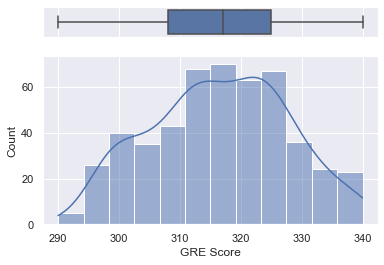

In [18]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='GRE Score', ax=ax_box)
sns.histplot(data=data, x="GRE Score", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

### From the above graph, we can say - 
- Average GRE score is around 318.
- 25% of the score is less than 310.
- 75% of the score is less than 325.

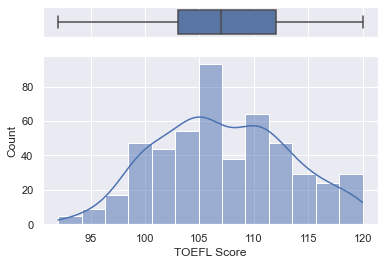

In [19]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='TOEFL Score', ax=ax_box)
sns.histplot(data=data, x="TOEFL Score", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

### From the above graph, we can say - 
- Average TOEFL score is around 106.
- 25% of the score is less than 104.
- 75% of the score is less than 112.

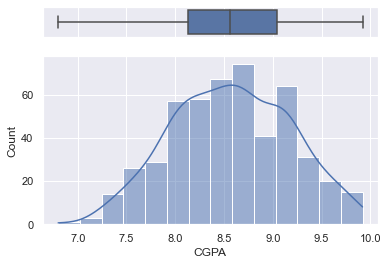

In [20]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='CGPA', ax=ax_box)
sns.histplot(data=data, x="CGPA", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

### From the above graph, we can say - 
- Average CGPA is around 8.5.
- 25% of the CGPA is less than 8.25.
- 75% of the CGPA is less than 9.0.

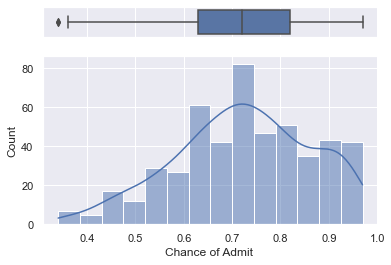

In [21]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='Chance of Admit ', ax=ax_box)
sns.histplot(data=data, x="Chance of Admit ", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

### From the above graph, we can say - 
- Average Chance of Admit is around 0.7.
- 25% of the score is less than 0.65.
- 75% of the score is less than 0.82.

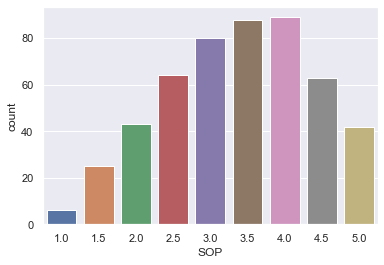

In [22]:
sns.countplot(x='SOP',data=data)
plt.show()

****As seen earlier the SOP with strength from 2.5 to 4.5 have most records.****

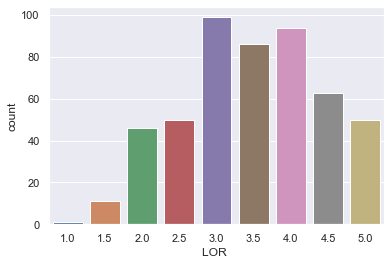

In [23]:
sns.countplot(x='LOR ',data=data)
plt.show()

****Similarly for LOR the most common strength is from 3.0 to 4.5.****

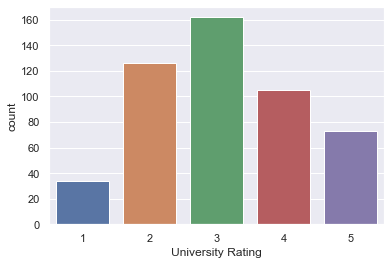

In [24]:
sns.countplot(x='University Rating',data=data)
plt.show()

****Most common unversity ratings are 2,3 and 4.****

<hr>

# Bi-Variate Analysis

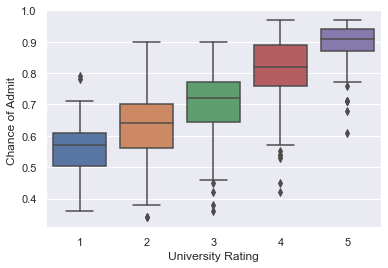

In [25]:
sns.boxplot(x='University Rating',y='Chance of Admit ',data=data)
plt.show()

****We can see that the avg. chance of admit increases as the university rating increases.****

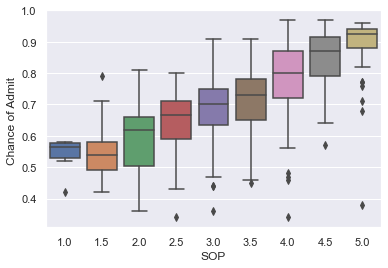

In [26]:
sns.boxplot(x='SOP',y='Chance of Admit ',data=data)
plt.show()

****We can also see that the avg. chance of admit increases as the strength of SOP increases.****

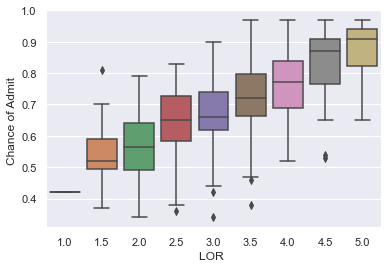

In [27]:
sns.boxplot(x='LOR ',y='Chance of Admit ',data=data)
plt.show()

****Here we can drop the record with LOR with strength 1.0 as it has only 1 record.****

In [28]:
data = data[data["LOR "]!=1]

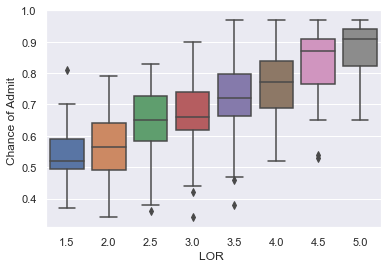

In [29]:
sns.boxplot(x='LOR ',y='Chance of Admit ',data=data)
plt.show()

****We can see a similar trend with LOR, as the strength of LOR increases the chance of admit increases.****

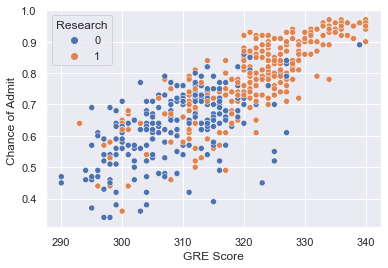

In [30]:
sns.scatterplot(x='GRE Score',y='Chance of Admit ',data=data,hue='Research')
plt.show()

****From the above graph we can say that GRE score and Chance of admit has a linear relationship.****

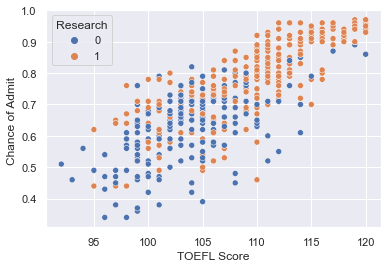

In [31]:
sns.scatterplot(x='TOEFL Score',y='Chance of Admit ',data=data,hue='Research')
plt.show()

****From the above graph we can say that TOEFL score and Chance of admit has a linear relationship.****

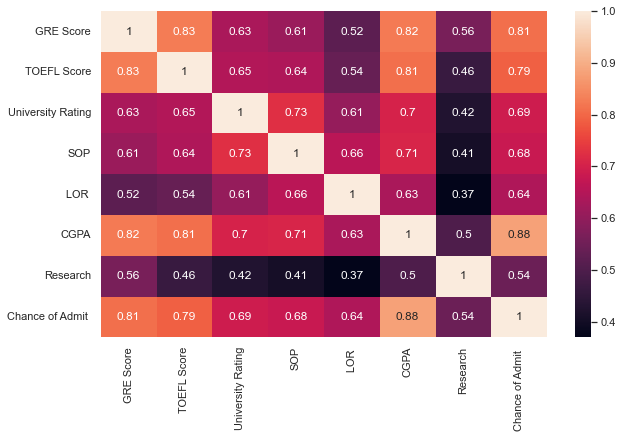

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

****Almost all the variables are highly co-related so we need to do VIF to drop the columns.****

## Checking for realtionship of Chance of Admit(Target Variables) with the Independant variables.

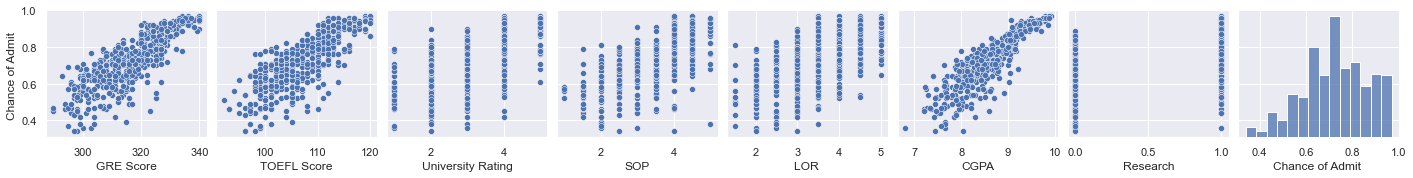

In [33]:
sns.pairplot(data,y_vars=['Chance of Admit '])
plt.show()

****From the above graphs we can see a linear realtionship between the independant and target variable.****

In [59]:
from pandas_profiling import ProfileReport


# Generate an automated EDA report
profile = ProfileReport(data, title='Admissions Dataset EDA Report', explorative=True)
profile.to_widgets()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<hr>

# Linear Regression

## Basic Assumptions - 
1. There should be a linear relationship of input variables and output variable.
2. Target variable is normally distributed. 
3. Independant variables have no perfect or exact relationship.

## Checking Assumptions

### Assumption 1 - There should be a linear relationship of input variables and output variable.

As already seen earlier there exists a linear relationship between input variables and output variable.

### Assumption 2 - Target variable is normally distributed

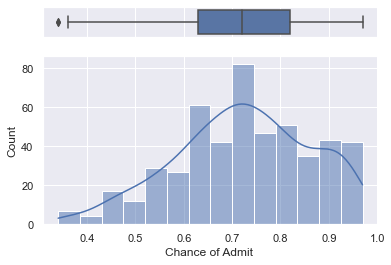

In [34]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=data,x='Chance of Admit ', ax=ax_box)
sns.histplot(data=data, x="Chance of Admit ", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

#### We can see some outliers in the data. Lets remove the outliers 

In [35]:
Q3 = data['Chance of Admit '].quantile(0.75)
Q1 = data['Chance of Admit '].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
(upper,lower)

(1.105, 0.3450000000000001)

In [36]:
data = data[(data['Chance of Admit ']>lower) & (data['Chance of Admit ']<upper)]

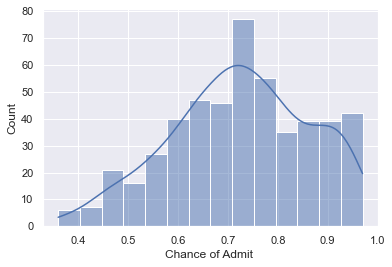

In [37]:
sns.histplot(data=data,x='Chance of Admit ',kde=True)
plt.show()

#### The graph looks almost normal we can confirm it with Q-Q plot.

### Q-Q Plot

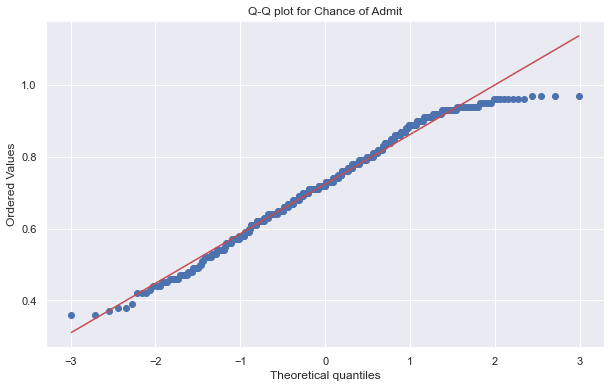

In [38]:
plt.figure(figsize=(10,6))
stats.probplot(data['Chance of Admit '], plot= plt, dist="norm")
plt.title('Q-Q plot for Chance of Admit')
plt.show()

<b>The data is almost along the line which means the data is almost normal</b>

### Standardizing the data

In [39]:
ss = StandardScaler()
x = data.drop(columns=['Chance of Admit '])
y = data['Chance of Admit ']
cols = x.columns
x[cols] = ss.fit_transform(x[cols])

### Assumpiton 3 - 
No Multi-colinearity : Independant variables have no perfect or exact relationship.

<b>Checking Multi-colinearity using VIF<b/>

In [40]:
vif = pd.DataFrame()
x_t = x
vif['features'] = x_t.columns
vif['vif'] = [variance_inflation_factor(x_t.values, i) for i in range(x_t.shape[1])]
print(vif)

            features       vif
0          GRE Score  4.402221
1        TOEFL Score  3.838492
2  University Rating  2.600570
3                SOP  2.835667
4               LOR   2.004829
5               CGPA  4.701520
6           Research  1.483072


<b>There is no Feature with VIF more than 5. So we can proceed with model building.</b>

## Statsmodel - OLS Model

In [41]:
x_sm = sm.add_constant(x)
sm_model = sm.OLS(y,x_sm).fit()
print(sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     323.3
Date:                Sat, 25 Feb 2023   Prob (F-statistic):          6.00e-179
Time:                        19:43:32   Log-Likelihood:                 706.09
No. Observations:                 497   AIC:                            -1396.
Df Residuals:                     489   BIC:                            -1363.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7239      0.00

### From the above data, we can say - 
- R^2 - 0.822
- Adj R^2 - 0.82
- Unviersity Rating and SOP having P more than 0.05 which means it doesn't improve R^2 for us as their coef is very near to 0.

In [42]:
new_x = x.drop(columns=['SOP','University Rating'])

### Checking for the VIF for after removing variables

In [43]:
new_vif = pd.DataFrame()
new_x_t = new_x
variable_sm = sm_model.model.exog
new_vif['features'] = new_x_t.columns
new_vif['vif'] = [variance_inflation_factor(new_x_t.values, i) for i in range(new_x_t.shape[1])]
print(new_vif)

      features       vif
0    GRE Score  4.392146
1  TOEFL Score  3.732753
2         LOR   1.680963
3         CGPA  4.308837
4     Research  1.475574


<b>Still there is no Feature with VIF more than 5. So we can proceed with model building.</b>

In [44]:
new_x_sm = sm.add_constant(new_x)
new_sm_model = sm.OLS(y,new_x_sm).fit()
print(new_sm_model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     449.6
Date:                Sat, 25 Feb 2023   Prob (F-statistic):          1.15e-180
Time:                        19:43:32   Log-Likelihood:                 703.89
No. Observations:                 497   AIC:                            -1396.
Df Residuals:                     491   BIC:                            -1371.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7239      0.003    273.229      

### From the above data, we can say - 
- R^2 - 0.821
- Adj R^2 - 0.819
- Now the R^2 is having more significance.

# Evaluating the model we trained

In [45]:
x_train,x_test,y_train,y_test = train_test_split(new_x,y,test_size=0.2,random_state=1)

In [46]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print('Score:',lr.score(x_train,y_train))

Score: 0.8217996954288399


In [47]:
y_pred = lr.predict(x_test)

In [48]:
print("Mean Absolute Error :",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error :",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error :",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Percentage Error :",mean_absolute_percentage_error(y_test,y_pred))

Mean Absolute Error : 0.04147037495847901
Mean Squared Error : 0.0034141454229344266
Root Mean Squared Error : 0.05843068905065579
Mean Absolute Percentage Error : 0.06370614652531759


### Checking Residuals

In [49]:
pred = lr.predict(x_train)
errors = pred-y_train

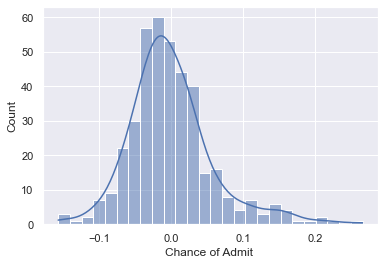

In [50]:
sns.histplot(errors,kde=True)
plt.show()

### Checking for normality with Q-Q Plot¶

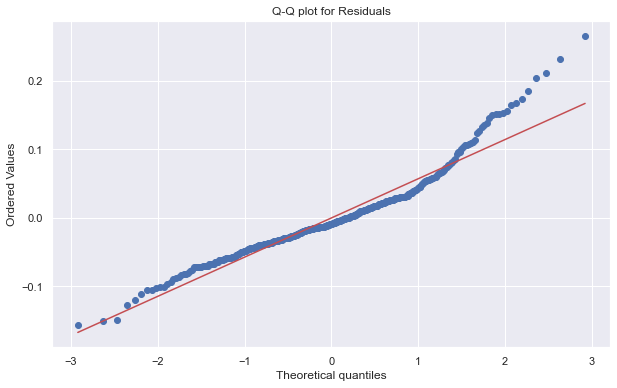

In [51]:
plt.figure(figsize=(10,6))
stats.probplot(errors, plot= plt, dist="norm")
plt.title('Q-Q plot for Residuals')
plt.show()

<b>Error almost follows the Normal distribution.</b>

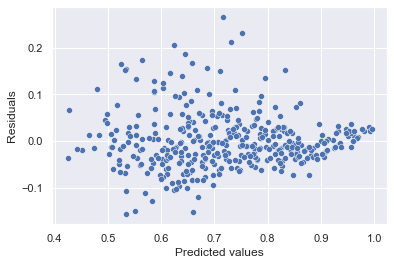

In [52]:
sns.scatterplot(x=pred,y=errors)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

<b>It doesn't have a perfect homoscedasticity. Reason for this might be the less amount of data present.</b>

## Creating a new dataframe with some dummy data to predict the 'Chance of admit'

In [53]:
dummy_data = np.array([[320,112,3,4,2,9,1],[320,112,2,3,4,9,0],[320,112,4,4,5,6,1],[310,112,5,2,2,8,1],[320,105,1,2,2,8,1],[290,100,2,2,5,9,1]])

In [54]:
ddata = pd.DataFrame(data=dummy_data,columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research'])

In [55]:
new_cols = ddata.columns
ddata[new_cols] = ss.transform(ddata[new_cols])

In [56]:
ddata.drop(columns=['University Rating','SOP'],inplace=True)

In [57]:
ddata.head()

GRE Score  TOEFL Score      LOR       CGPA  Research
0   0.304345     0.786140 -1.626526  0.695228  0.880341
1   0.304345     0.786140  0.552405  0.695228 -1.135924
2   0.304345     0.786140  1.641871 -4.298434  0.880341
3  -0.586464     0.786140 -1.626526 -0.969326  0.880341
4   0.304345    -0.374718 -1.626526 -0.969326  0.880341

In [58]:
pred = lr.predict(ddata)
print(pred)

[0.77753241 0.79382138 0.46197852 0.63558348 0.62949461 0.74752096]


### The above predicted value tells us - 
- First two records had great GRE and TOEFL score as well as the LOR and CGPA was high so the chance of admit is high.
- But since we can see that the CGPA is more relevant, with the last predicted value the GRE Score and TOEFL score were low but got a good chance of admit as it had higher CGPA. 

# Recommendation - 
- For better chance of admit we can recommend student some good GRE and TOEFL study material as it is really important for having the good score there.
- We can even give awareness to student to study hard and get more CGPA during their under-graduation as it will impact the chance of admit significantly.
- Research is a good add on with some good research recommendation which students can perform during undergraduation can help them boost their profile.
- As well as with good CGPA and research the student might also get good LOR which again will boost the chance of admit.